# Palmer Penguin Project - Taeyun Kim

In [384]:
# The "Palmer Penguin" is one of the most well known machine-learning project
# along with "Wine Quality" and "Iris Flower" projects that we have done during the lecture.
# Therefore, as an introductory level student, I thought "Palmer Penguin" project 
# could be a great source to practice my skills and use it as my final project
# for the Introduction to Machine Learning class. 

# Importing Libraries

In [385]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Loading Dataframe

In [386]:
df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [387]:
# drop rows that contain NaN from the dataframe
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Context (Overview of Data)

In [388]:
numOfCol = len(df.columns)
numOfRow = len(df.index)
print("There are", numOfCol, "columns and", numOfRow, "rows in this dataset.")

There are 7 columns and 334 rows in this dataset.


In [389]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [390]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


The length of culmen and its depth appears to have a weak, negative correlation (close to no-correlation).


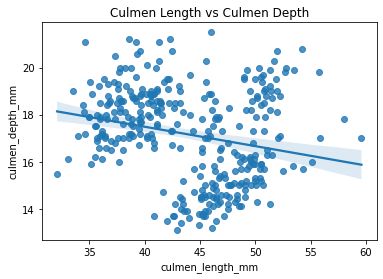

In [391]:
sns.regplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = df)
plt.title('Culmen Length vs Culmen Depth')
print("The length of culmen and its depth appears to have a weak, negative correlation (close to no-correlation).")

The culmen length and flipper length appears to have a positive correlation.


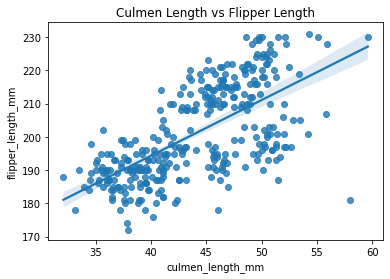

In [392]:
sns.regplot(x = "culmen_length_mm", y = "flipper_length_mm", data = df)
plt.title('Culmen Length vs Flipper Length')
print("The culmen length and flipper length appears to have a positive correlation.")

The culmen length and the body mass appears to have a positive correlation.


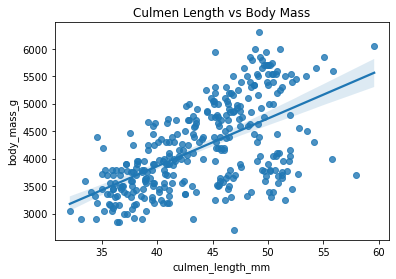

In [393]:
sns.regplot(x = "culmen_length_mm", y = "body_mass_g", data = df)
plt.title('Culmen Length vs Body Mass')
print("The culmen length and the body mass appears to have a positive correlation.")

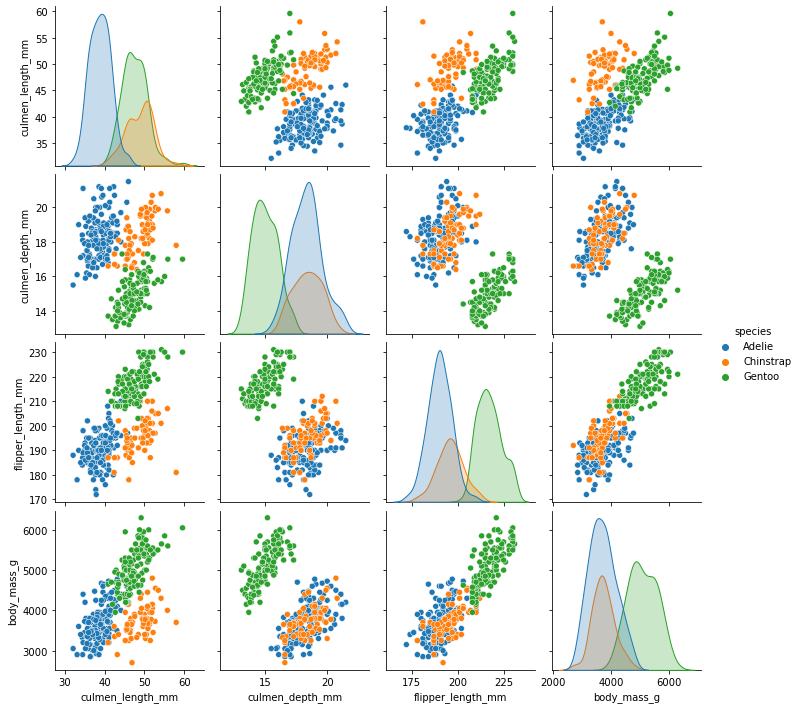

In [394]:
# pairplot of 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'
sns.pairplot(df, hue='species', vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Data Scaling

In [395]:
df2 = df.drop(['island', 'sex'], axis=1)
df2

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [396]:
scaler=StandardScaler()
scaler.fit(df2.drop(['species'],axis=1))

df_scaled=pd.DataFrame(scaler.transform(df2.drop(['species'],axis=1)), columns=knn_df.columns[1:])

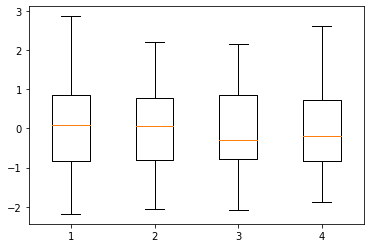

In [397]:
plt.boxplot(df_scaled)
plt.show()

# K-Nearest Neighbor

In [398]:
X=df_scaled
y=df['species']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [399]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [400]:
print(classification_report(y_test, knn_pred))
print("The KNN's accuracy score is: " + str(accuracy_score(y_test.values.ravel(), knn_pred)))

              precision    recall  f1-score   support

      Adelie       0.97      0.94      0.95        31
   Chinstrap       0.86      0.92      0.89        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.96        67
   macro avg       0.94      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67

The KNN's accuracy score is: 0.9552238805970149


# Decision Tree

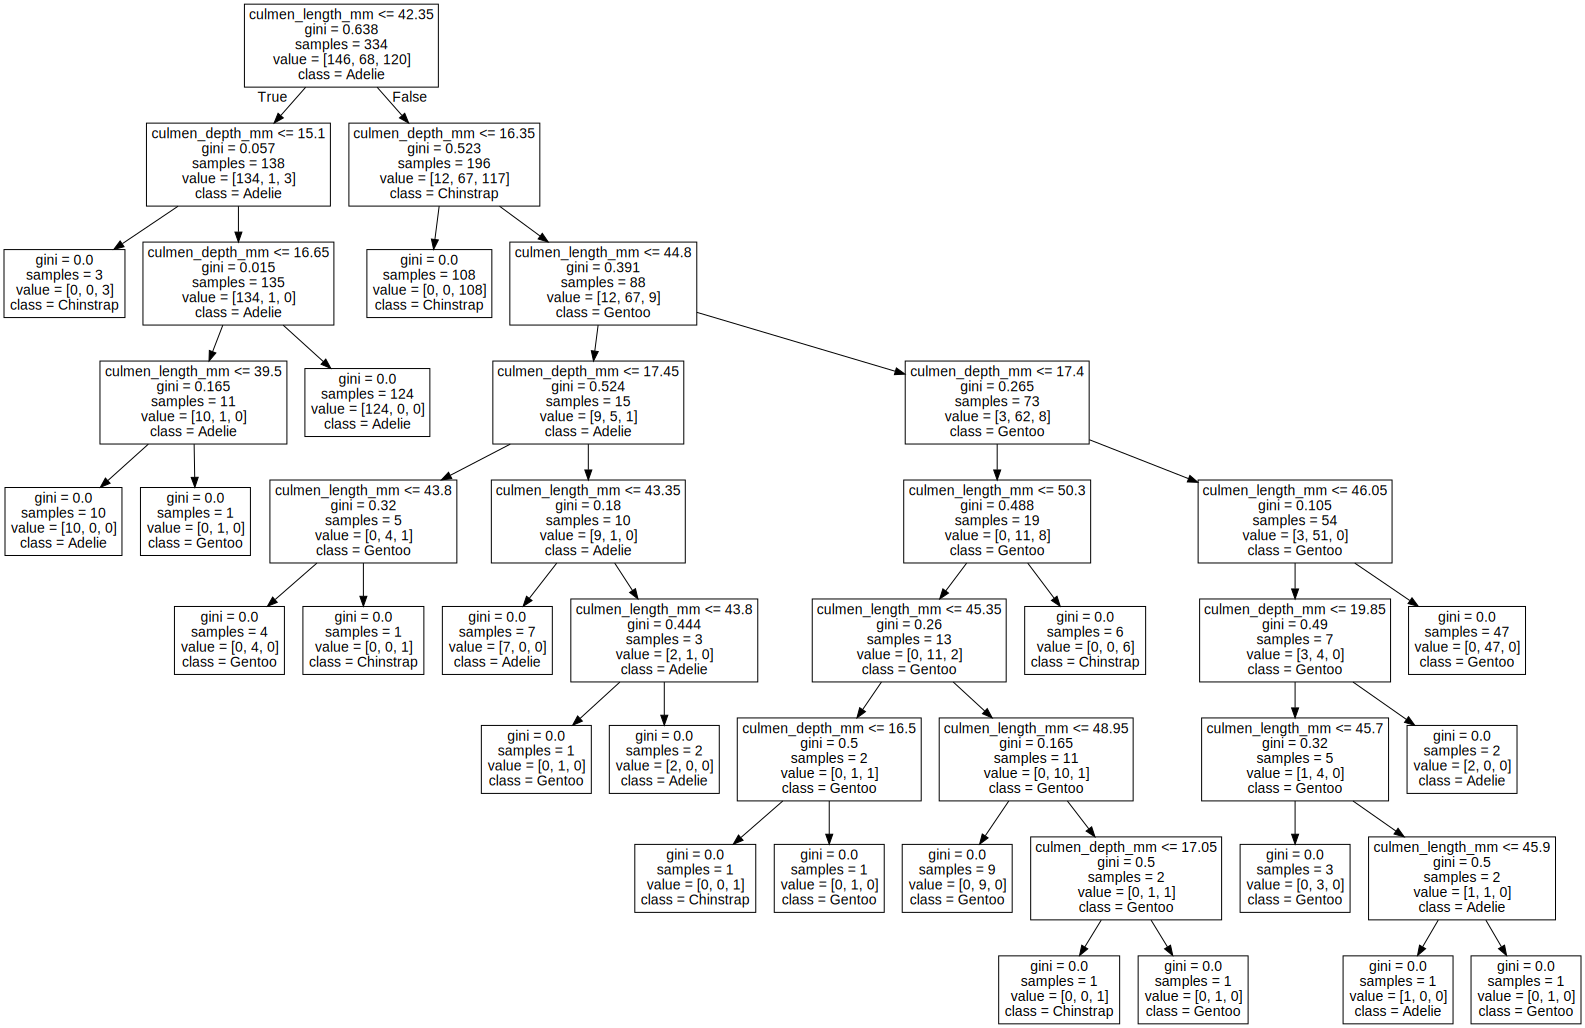

In [401]:
# Drawing decision tree using "culmen_length" and "culmen_depth"
dot_data_1 = tree.export_graphviz(clf, 
                         feature_names=['culmen_length_mm', 'culmen_depth_mm'],  
                         class_names=['Adelie', 'Gentoo', 'Chinstrap'],)  
                      
graph_1 = graphviz.Source(dot_data_1)  
graph_1

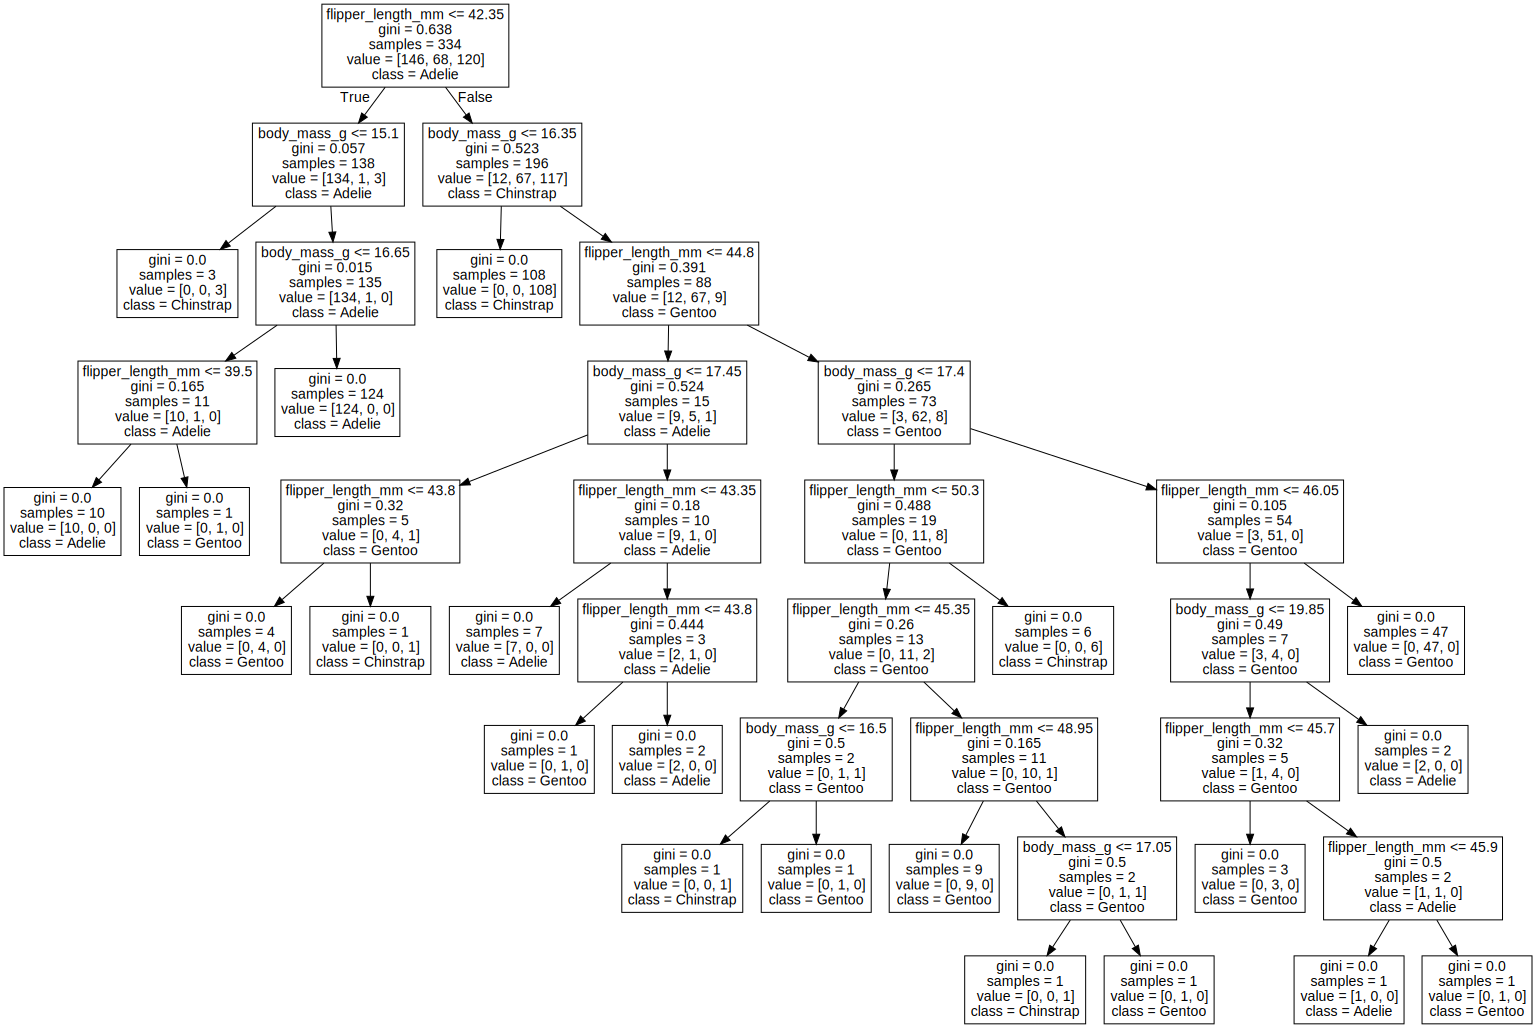

In [402]:
# Drawing decision tree using 'flipper_length' and 'body_mass'
dot_data_2 = tree.export_graphviz(clf, 
                         feature_names=['flipper_length_mm', 'body_mass_g'],  
                         class_names=['Adelie', 'Gentoo', 'Chinstrap'],)  
                      
graph_2 = graphviz.Source(dot_data_2)  
graph_2

In [403]:
features = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
labels = df['species'].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [404]:
# Calculating the accuracy score of the Decision Tree
dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=10)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)
print("The Decision Tree's accuracy score is: ",accuracy_score(y_test, dtree_predicted))

The Decision Tree's accuracy score is:  0.9850746268656716


# Support Vector Machines

In [405]:
# Calculating the accuracy score of the linear svm
linear_svm = SVC(kernel='linear',C=0.1, gamma=0.003,probability=True).fit(X_train, y_train)
linear_svm_predicted = linear_svm.predict(X_test)

In [406]:
print(classification_report(y_test,linear_svm_predicted))
print("The Linear SVM's accuracy score is: ",accuracy_score(y_test, linear_svm_predicted))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        27
   Chinstrap       1.00      1.00      1.00         8
      Gentoo       1.00      1.00      1.00        32

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

The Linear SVM's accuracy score is:  1.0


In [413]:
# Calculating the accuracy score of the polynomial svm
poly_svm = SVC(kernel='poly',C=0.1, gamma=0.003,probability=True).fit(X_train, y_train)
poly_svm_predicted = poly_svm.predict(X_test)

In [414]:
print(classification_report(y_test, poly_svm_predicted))
print("The Polynomial SVM's accuracy score is: ",accuracy_score(y_test, poly_svm_predicted))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        27
   Chinstrap       1.00      1.00      1.00         8
      Gentoo       1.00      1.00      1.00        32

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

The Polynomial SVM's accuracy score is:  1.0


In [441]:
# Calculating the accuracy score of the rbf svm
rbf_svm = SVC(kernel='rbf',C=1, gamma=0.1,probability=True).fit(X_train, y_train)
rbf_svm_predicted = rbf_svm.predict(X_test)

In [442]:
print(classification_report(y_test, rbf_svm_predicted))
print("The RBF SVM's accuracy score is: ",accuracy_score(y_test, rbf_svm_predicted))

              precision    recall  f1-score   support

      Adelie       0.53      1.00      0.69        27
   Chinstrap       1.00      0.12      0.22         8
      Gentoo       1.00      0.47      0.64        32

    accuracy                           0.64        67
   macro avg       0.84      0.53      0.52        67
weighted avg       0.81      0.64      0.61        67

The RBF SVM's accuracy score is:  0.6417910447761194


# Hard Voting

In [443]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
print("The Hard Voting's accuracy score is: ",accuracy_score(y_test, hard_voting_predicted))

The Hard Voting's accuracy score is:  1.0


# Soft Voting

In [444]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
print("The Soft Voting's accuracy score is: ", accuracy_score(y_test, soft_voting_predicted))

The Soft Voting's accuracy score is:  1.0


# Conclusion

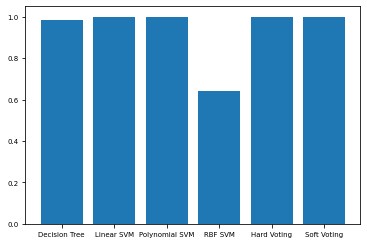

In [445]:
x = np.arange(6)
plt.bar(x, height= [
                    accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, linear_svm_predicted),
                    accuracy_score(y_test, poly_svm_predicted),
                    accuracy_score(y_test, rbf_svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                   ])
plt.xticks(x, ['Decision Tree','Linear SVM','Polynomial SVM','RBF SVM','Hard Voting','Soft Voting']);
plt.tick_params(axis='both', which='major', labelsize=7)

In [449]:
print("[Accuarcy Score]")
print("KNN (with Scaled Data):  0.9552238805970149")
print("Decision Tree         : ",accuracy_score(y_test, dtree_predicted))
print("Linear SVM            : ",accuracy_score(y_test, linear_svm_predicted))
print("Polynomial SVM        : ",accuracy_score(y_test, poly_svm_predicted))
print("RBF SVM               : ",accuracy_score(y_test, rbf_svm_predicted))
print("Hard Voting           : ",accuracy_score(y_test, hard_voting_predicted))
print("Soft Voting           : ", accuracy_score(y_test, soft_voting_predicted))

[Accuarcy Score]
KNN (with Scaled Data):  0.9552238805970149
Decision Tree         :  0.9850746268656716
Linear SVM            :  1.0
Polynomial SVM        :  1.0
RBF SVM               :  0.6417910447761194
Hard Voting           :  1.0
Soft Voting           :  1.0
